<a href="https://colab.research.google.com/github/pranav-sirnapalli/S-P_stock_predictor/blob/main/S%26P_stock_predictor_for_realtime_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf   # To download daily stock values from yahoo

In [3]:
sp500 = yf.Ticker("^GSPC")

In [4]:
sp500 = sp500.history(period="max")

In [9]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-26 00:00:00-04:00,4175.990234,4183.600098,4127.899902,4137.229980,4277640000,0.0,0.0
2023-10-27 00:00:00-04:00,4152.930176,4156.700195,4103.779785,4117.370117,4019500000,0.0,0.0
2023-10-30 00:00:00-04:00,4139.390137,4177.470215,4132.939941,4166.819824,3911140000,0.0,0.0


In [10]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-10-19 00:00:00-04:00', '2023-10-20 00:00:00-04:00',
               '2023-10-23 00:00:00-04:00', '2023-10-24 00:00:00-04:00',
               '2023-10-25 00:00:00-04:00', '2023-10-26 00:00:00-04:00',
               '2023-10-27 00:00:00-04:00', '2023-10-30 00:00:00-04:00',
               '2023-10-31 00:00:00-04:00', '2023-11-01 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24075, freq=None)

<Axes: xlabel='Date'>

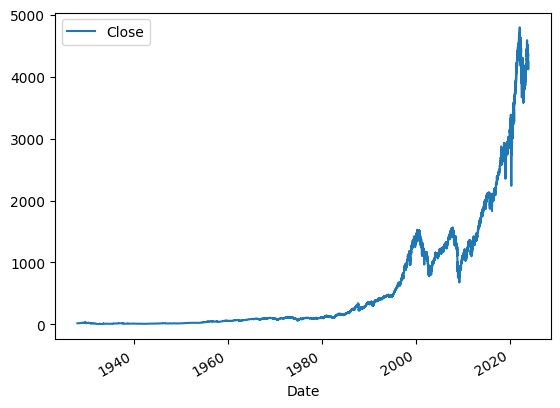

In [12]:
sp500.plot.line(y='Close', use_index=True)

In [13]:
# Data Cleaning
del sp500['Dividends']
del sp500['Stock Splits']

In [14]:
# Setting up a target for the model
sp500['Tomorrow'] = sp500['Close'].shift(-1)
# Shifting all prices back one day

In [15]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-10-26 00:00:00-04:00,4175.990234,4183.600098,4127.899902,4137.229980,4277640000,4117.370117
2023-10-27 00:00:00-04:00,4152.930176,4156.700195,4103.779785,4117.370117,4019500000,4166.819824
2023-10-30 00:00:00-04:00,4139.390137,4177.470215,4132.939941,4166.819824,3911140000,4193.799805


In [16]:
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)

In [17]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-10-26 00:00:00-04:00,4175.990234,4183.600098,4127.899902,4137.229980,4277640000,4117.370117,0
2023-10-27 00:00:00-04:00,4152.930176,4156.700195,4103.779785,4117.370117,4019500000,4166.819824,1
2023-10-30 00:00:00-04:00,4139.390137,4177.470215,4132.939941,4166.819824,3911140000,4193.799805,1


In [18]:
# Removing all data that is before 1990 as it is irrelevant
sp500 = sp500.loc["1990-01-01":].copy()

In [19]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-10-26 00:00:00-04:00,4175.990234,4183.600098,4127.899902,4137.229980,4277640000,4117.370117,0
2023-10-27 00:00:00-04:00,4152.930176,4156.700195,4103.779785,4117.370117,4019500000,4166.819824,1
2023-10-30 00:00:00-04:00,4139.390137,4177.470215,4132.939941,4166.819824,3911140000,4193.799805,1


In [20]:
# Training the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
# Division into train and test sets
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [21]:
RandomForestClassifier(min_samples_split=100, random_state=1)

RandomForestClassifier(min_samples_split=100, random_state=1)

In [22]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [23]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [24]:
# Current prediction before training
precision_score(test['Target'], preds)

0.48484848484848486

In [25]:
combined = pd.concat([test['Target'], preds], axis=1)

<Axes: xlabel='Date'>

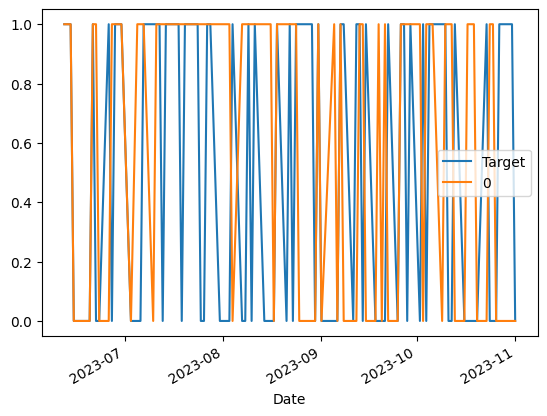

In [26]:
combined.plot()

In [27]:
# Building a robust way to test the alg
def predict(train, test, predictors, model):
  model.fit(train[predictors], train['Target'])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name='Predictions')
  combined = pd.concat([test['Target'], preds], axis=1)
  return combined

In [28]:
# Below function trains data on every 10 year followed by the next 10
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [29]:
predictions = backtest(sp500, model, predictors)

In [30]:
predictions['Predictions'].value_counts()

0    3445
1    2580
Name: Predictions, dtype: int64

In [31]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5275193798449612

In [32]:
predictions['Target'].value_counts() / predictions.shape[0]

1    0.533278
0    0.466722
Name: Target, dtype: float64

In [41]:
# adding additional predictors to improve accuracy
import math
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()['Target']

  new_predictors += [ratio_column, trend_column]

In [42]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-26 00:00:00-04:00,4175.990234,4183.600098,4127.899902,4137.229980,4277640000,4117.370117,0,0.994049,0.0,0.984451,1.0,0.943640,26.0,0.991388,123.0,1.058001,527.0
2023-10-27 00:00:00-04:00,4152.930176,4156.700195,4103.779785,4117.370117,4019500000,4166.819824,1,0.997594,0.0,0.984730,1.0,0.940485,26.0,0.986425,122.0,1.052643,526.0
2023-10-30 00:00:00-04:00,4139.390137,4177.470215,4132.939941,4166.819824,3911140000,4193.799805,1,1.005969,1.0,0.998956,2.0,0.952909,27.0,0.997990,123.0,1.064990,526.0


In [43]:
sp500 = sp500.dropna()

In [44]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25 00:00:00-04:00,4232.419922,4232.419922,4181.419922,4186.770020,3869370000,4137.229980,0,0.992778,1.0,0.989609,1.0,0.953576,26.0,1.003576,123.0,1.070961,527.0
2023-10-26 00:00:00-04:00,4175.990234,4183.600098,4127.899902,4137.229980,4277640000,4117.370117,0,0.994049,0.0,0.984451,1.0,0.943640,26.0,0.991388,123.0,1.058001,527.0
2023-10-27 00:00:00-04:00,4152.930176,4156.700195,4103.779785,4117.370117,4019500000,4166.819824,1,0.997594,0.0,0.984730,1.0,0.940485,26.0,0.986425,122.0,1.052643,526.0


In [46]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [47]:
# re-Building a robust way to test the alg
def predict(train, test, predictors, model):
  model.fit(train[predictors], train['Target'])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds>=.6] = 1
  preds[preds<.6] = 0
  # above rebuild reduce no: of trading days but increase chance of trade on that day
  preds = pd.Series(preds, index=test.index, name='Predictions')
  combined = pd.concat([test['Target'], preds], axis=1)
  return combined

In [49]:
predictions= backtest(sp500, model, new_predictors)

In [50]:
predictions['Predictions'].value_counts()

0.0    4199
1.0     825
Name: Predictions, dtype: int64

In [51]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5709090909090909